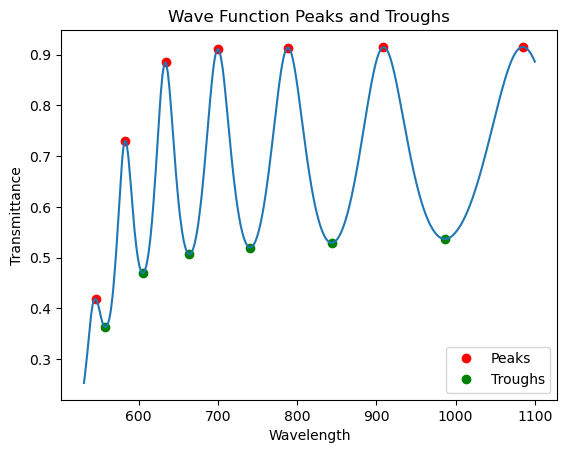

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve, minimize, basinhopping
from scipy.signal import find_peaks


df = pd.read_excel('veriler.xlsx')    #excel dosyasını okuyor.veriler.xlsx içinde veriler ve data noktalarımız var.
lambdas = df['Lambda (nm)'].values    #excel dosyasını sol tarafta ki çalışma alanına ekliyoruz(yüklüyoruz).
film = df['Transmittance'].values     #excel veri dosyamız içinde Lambda,transmittance,vidrio gibi veri sütunları var.
glass = df['Vidrio'].values           #Bu veri sütunlarında bulunan dosyaları okuyor ve yeni bir eşitliğe atıyoruz.
cut = np.where(lambdas > 530) #filtreledik,zoomladık#where fonksiyonu
lambdas = lambdas[cut]
film = film[cut]
glass = glass[cut]
peaks, _ = find_peaks(film, prominence=0.01) #çukur noktalarını bul .find_peak bir fonksiyon python library de
troughs= [np.argmin(film[peaks[i]:peaks[i+1]]) + peaks[i] for i in range(len(peaks)-1)] #çukur noktalarını bul - yerleştir
plt.plot(lambdas[peaks], film[peaks], 'ro', label='Peaks')
plt.plot(lambdas[troughs], film[troughs], 'go', label='Troughs')
plt.plot(lambdas, film)
#upper_envelope_spline = UnivariateSpline(lambdas[peaks], film[peaks], s=0, k=2, ext=3)
#lower_envelope_spline = UnivariateSpline(lambdas[troughs], film[troughs], s=0, k=2, ext=3)
#plt.plot(lambdas, envelope_upper_y, 'r--', label='Upper Envelope (Spline)', linewidth=2, zorder=2)
#plt.plot(lambdas, envelope_lower_y, 'g--', label='Lower Envelope (Spline)', linewidth=2, zorder=2)
#plt.plot(x,y)
#plt.show()
plt.xlabel('Wavelength')
plt.ylabel('Transmittance')
plt.title('Wave Function Peaks and Troughs')
plt.legend()
plt.show()

In [7]:
print("Maxima Points (Wavelength nm, Transmission):")
for peak in peaks:   #yukarı kısımda bulduğumuz peaks noktalarını sürekli olarak for döngüsüne soktuk.sıralı olarak gelecek.
    print(f"({lambdas[peak]:.2f}, {film[peak]:.4f})")

# Print the minima points
print("\nMinima Points (Wavelength nm, Transmission):")
for trough in troughs:
    print(f"({lambdas[trough]:.2f}, {film[trough]:.4f})")


Maxima Points (Wavelength nm, Transmission):
(546.00, 0.4188)
(583.00, 0.7305)
(634.00, 0.8852)
(700.00, 0.9111)
(788.00, 0.9140)
(909.00, 0.9148)
(1085.00, 0.9154)

Minima Points (Wavelength nm, Transmission):
(558.00, 0.3633)
(605.00, 0.4698)
(664.00, 0.5066)
(741.00, 0.5200)
(844.00, 0.5293)
(987.00, 0.5368)


In [10]:
n_0 = 1
n_s = 1.5  #(substrat kırılma indeksi)
for peak, trough in zip(peaks, troughs):
    T_max = lambdas[peak]
    T_min = film[trough]# döngüye sokuyoruz.her bir değeri çekiyoruz.çünkü y ekseni transmittance x ekseni wavelengths

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + 2*((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))
    #**2 komutu karesini almaya yardımcı oluyor.
    # Print the calculated dielectric constant with associated wavelengths for maxima and minima
    print(f"Peak at {lambdas[peak]:.2f} nm, T_max = {T_max:.4f}")
    print(f"Trough at {lambdas[trough]:.2f} nm, T_min = {T_min:.4f}")
    print(f"Dielectric Constant: {dielectric_constant:.4f}\n")

Peak at 546.00 nm, T_max = 546.0000
Trough at 558.00 nm, T_min = 0.3633
Dielectric Constant: 9.8778

Peak at 583.00 nm, T_max = 583.0000
Trough at 605.00 nm, T_min = 0.4698
Dielectric Constant: 8.0055

Peak at 634.00 nm, T_max = 634.0000
Trough at 664.00 nm, T_min = 0.5066
Dielectric Constant: 7.5426

Peak at 700.00 nm, T_max = 700.0000
Trough at 741.00 nm, T_min = 0.5200
Dielectric Constant: 7.3895

Peak at 788.00 nm, T_max = 788.0000
Trough at 844.00 nm, T_min = 0.5293
Dielectric Constant: 7.2891

Peak at 909.00 nm, T_max = 909.0000
Trough at 987.00 nm, T_min = 0.5368
Dielectric Constant: 7.2101



In [13]:
for peak, trough in zip(peaks, troughs): #peaks değerlerinin hepsini sırala peak içine ata
    T_max = film[peak]                   #troughs değerlerinin hepsini sıraysıyla trough a ata
    T_min = film[trough]
#[i]: örneğin film[peak] film y eksen idi.film ekseninden i.peak değerlerini çıkar,kullan.i=0,1,2,3,4,....
    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + 2*((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt((dielectric_constant)**2 - ((n_0)*(n_s))**2))
    # n is refractive index
    # Print the calculated values with associated wavelengths for maxima and minima
    print(f"Peak at {lambdas[peak]:.2f} nm, T_max = {T_max:.4f}")
    print(f"Trough at {lambdas[trough]:.2f} nm, T_min = {T_min:.4f}")
    print(f"Dielectric Constant: {dielectric_constant:.4f}")
    print(f"Index of Refraction, n: {n:.4f}\n")

Peak at 546.00 nm, T_max = 0.4188
Trough at 558.00 nm, T_min = 0.3633
Dielectric Constant: 2.7194
Index of Refraction, n: 2.2333

Peak at 583.00 nm, T_max = 0.7305
Trough at 605.00 nm, T_min = 0.4698
Dielectric Constant: 3.9039
Index of Refraction, n: 2.7401

Peak at 634.00 nm, T_max = 0.8852
Trough at 664.00 nm, T_min = 0.5066
Dielectric Constant: 4.1582
Index of Refraction, n: 2.8349

Peak at 700.00 nm, T_max = 0.9111
Trough at 741.00 nm, T_min = 0.5200
Dielectric Constant: 4.1011
Index of Refraction, n: 2.8139

Peak at 788.00 nm, T_max = 0.9140
Trough at 844.00 nm, T_min = 0.5293
Dielectric Constant: 4.0106
Index of Refraction, n: 2.7803

Peak at 909.00 nm, T_max = 0.9148
Trough at 987.00 nm, T_min = 0.5368
Dielectric Constant: 3.9340
Index of Refraction, n: 2.7515



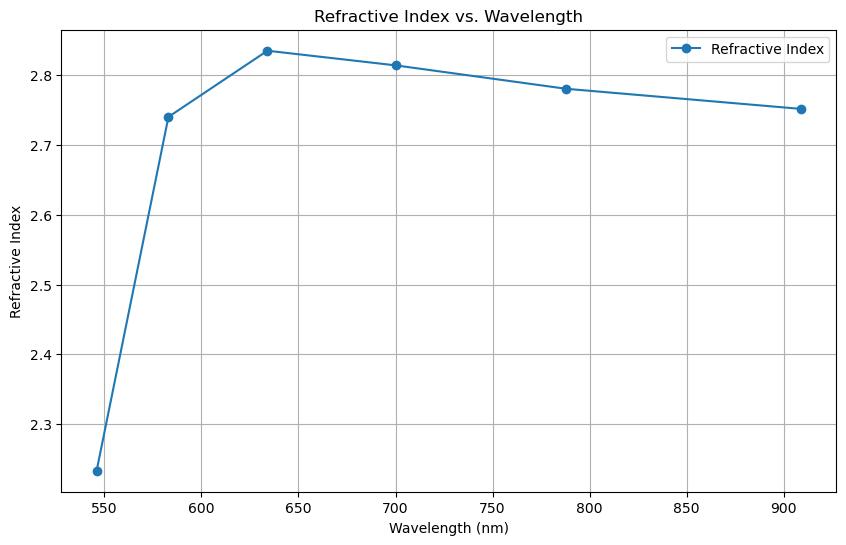

In [16]:
wavelengths = []
refractive_indices = []

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs): #for döngüsü ile T_max ve T_minleri sırayla yazdırıp işleme soktuk
    T_max = film[peak] #y eksenine ait verilerden tepe noktalarını datasetinden aldık
    T_min = film[trough]#y eksenine ait verilerden çukur noktalarını datasetinden aldık

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + 2*((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt((dielectric_constant)**2 - ((n_0)*(n_s))**2))

    # Store results for plotting
    wavelengths.append(lambdas[peak])  # You might want to average peak and trough wavelengths if they are meant to pair
    refractive_indices.append(n)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, refractive_indices, 'o-', label='Refractive Index')
plt.title('Refractive Index vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
plt.grid(True)
plt.legend()
plt.show()

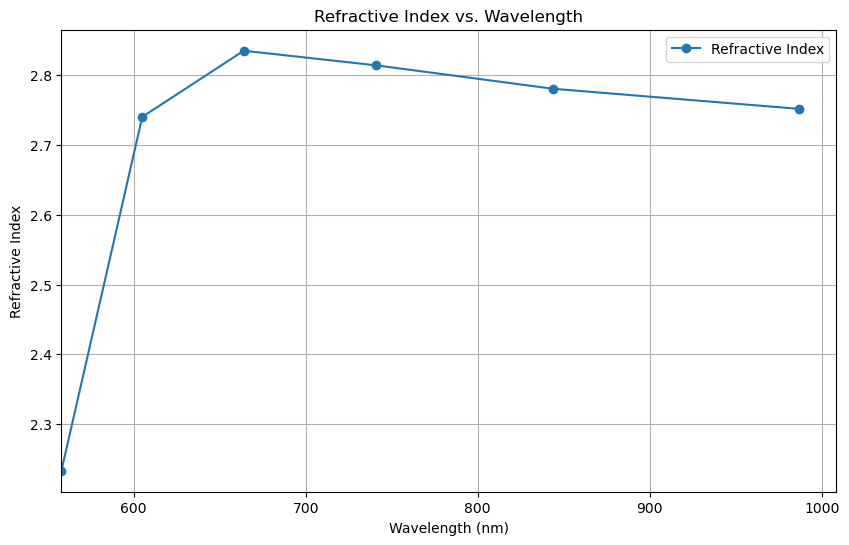

In [19]:
wavelengths = []
refractive_indices = []

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + 2*((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt((dielectric_constant)**2 - ((n_0)*(n_s))**2))

    # Store results for plotting
    wavelengths.append(lambdas[trough])  # You might want to average peak and trough wavelengths if they are meant to pair
    refractive_indices.append(n)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, refractive_indices, 'o-', label='Refractive Index') #plt.plot grafik çizmeye yarar.
                                                                        #plt.plot(x,y,o='orange')-o simgeli noktalar işaretli
plt.title('Refractive Index vs. Wavelength') #başlık
plt.xlabel('Wavelength (nm)')   #x ekseninin ismi
plt.ylabel('Refractive Index')  #y ekseninin ismi
plt.grid(True)
plt.legend()
plt.xlim(left=min(wavelengths))  #x eksenini minimm dalga boyundan başlat
plt.show()

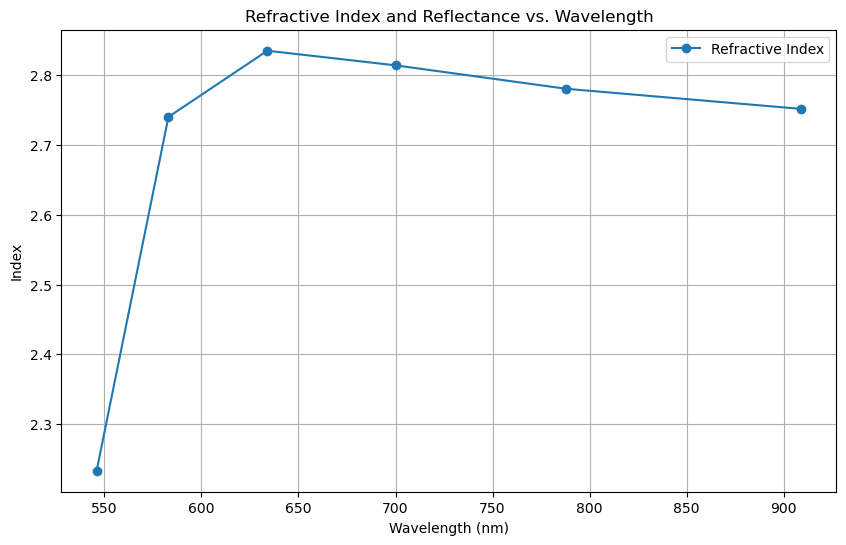

In [25]:
import numpy as np
import matplotlib.pyplot as plt


# Define the r function
#def calculate_r(n_0, n, n_s):
    #return abs((n_0 - (n**2 / n_s)) / (n_0 + (n**2 / n_s)))

# Lists to store the results
wavelengths = []
refractive_indices = []
reflectance= []

# Iterate
# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2) / 2 + 2 * (n_0 * n_s * (T_max - T_min)) / (T_max * T_min)

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt(dielectric_constant**2 - (n_0 * n_s)**2))

    # Calculate reflectance r
    #r = calculate_r(n_0, n, n_s)

    # Store results for plotting
    wavelengths.append(lambdas[peak])  # You might want to average peak and trough wavelengths if they are meant to pair
    refractive_indices.append(n)
    #reflectance.append(r)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, refractive_indices, 'o-', label='Refractive Index')
#plt.plot(wavelengths, reflectance, 's-', label='Reflective Index')
plt.title('Refractive Index and Reflectance vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Index')
plt.grid(True)
plt.legend()
#plt.xlim(left=min(wavelengths))
plt.show()



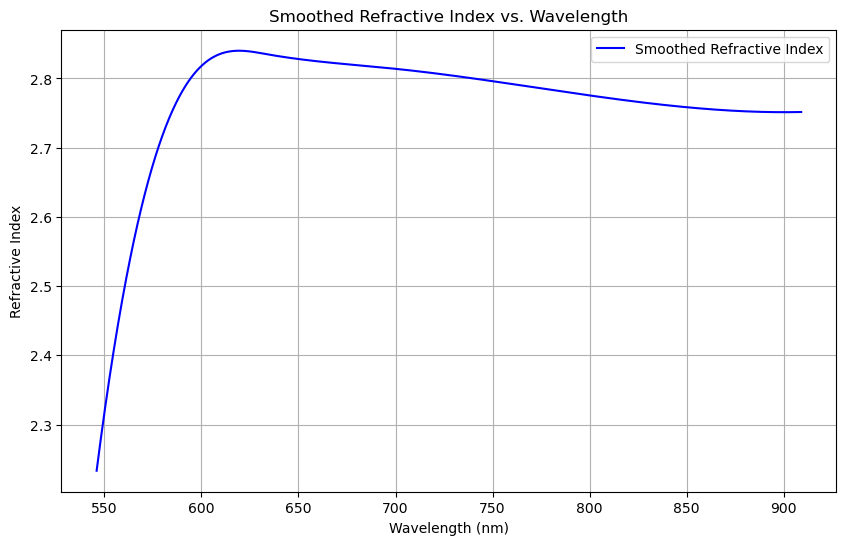

In [28]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

n_0 = 1
n_s = 1.5

# Prepare lists to store results for plotting
wavelengths = []
refractive_indices = []

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + 2*((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt((dielectric_constant)**2 - ((n_0)*(n_s))**2))

    # Store results for plotting
    wavelengths.append(lambdas[peak])  # Assuming peak corresponds well with trough for simplicity
    refractive_indices.append(n)

# Interpolation for a smooth curve
interp_function = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")
#elimizde ki data noktalarını dahil edip kullanmak için interpolate ediyoruz.
#data noktalarını dahil ederek sürekli grafik çizdiriyoruz

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000) #daha fazla veri aralığında continuous yapıyrouz
smooth_refractive_indices = interp_function(fine_lambdas)            #Maximumve minimum wavelength i 1000 aralığa böl.
                                                                     #1000 aralığa bölünmüş steplerle ilerle

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(fine_lambdas, smooth_refractive_indices, label='Smoothed Refractive Index', color='blue')
plt.title('Smoothed Refractive Index vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
plt.grid(True)
plt.legend()
plt.show()

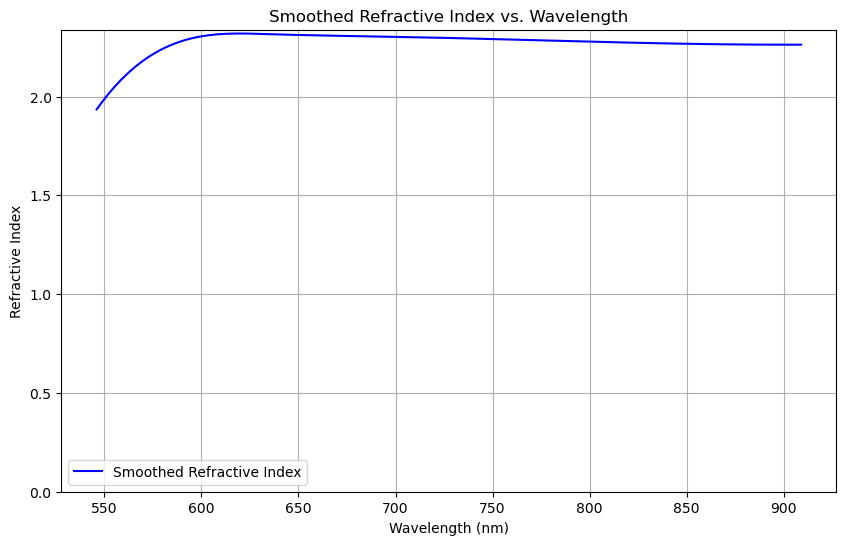

In [31]:
n_0 = 1
n_s = 1.5

# Prepare lists to store results for plotting
wavelengths = []
refractive_indices = []

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + ((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt((dielectric_constant)**2 - ((n_0)*(n_s))**2))

    # Store results for plotting
    wavelengths.append(lambdas[peak])  # Assuming trough corresponds well with trough for simplicity
    refractive_indices.append(n)      #peak ve peak ve trough ve trough arasında ki fark periyodiclikten dolayı aynı

# Interpolation for a smooth curve
interp_function = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000)  # sürekli yapıyoruz.
smooth_refractive_indices = interp_function(fine_lambdas)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(fine_lambdas, smooth_refractive_indices, label='Smoothed Refractive Index', color='blue')
plt.title('Smoothed Refractive Index vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
plt.grid(True)
plt.legend()

# Set y-axis to start from zero
plt.ylim(bottom=0)

plt.show()

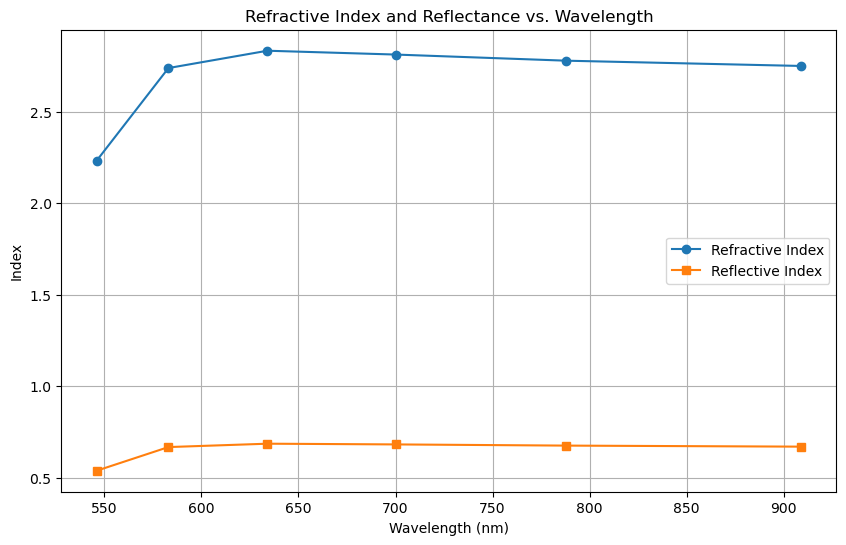

In [38]:
import numpy as np
import matplotlib.pyplot as plt


# Define the r function
def calculate_r(n_0, n, n_s):
    return abs((n_0 - (n**2 / n_s)) / (n_0 + (n**2 / n_s)))

# Lists to store the results
wavelengths = []
refractive_indices = []
reflectance= []

# Iterate
# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2) / 2 + 2 * (n_0 * n_s * (T_max - T_min)) / (T_max * T_min)

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt(dielectric_constant**2 - (n_0 * n_s)**2))

    # Calculate reflectance r
    r = calculate_r(n_0, n, n_s)

    # Store results for plotting
    wavelengths.append(lambdas[peak])  # You might want to average peak and trough wavelengths if they are meant to pair
    refractive_indices.append(n)
    reflectance.append(r)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, refractive_indices, 'o-', label='Refractive Index')
plt.plot(wavelengths, reflectance, 's-', label='Reflective Index')
plt.title('Refractive Index and Reflectance vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Index')
plt.grid(True)
plt.legend()

plt.show()



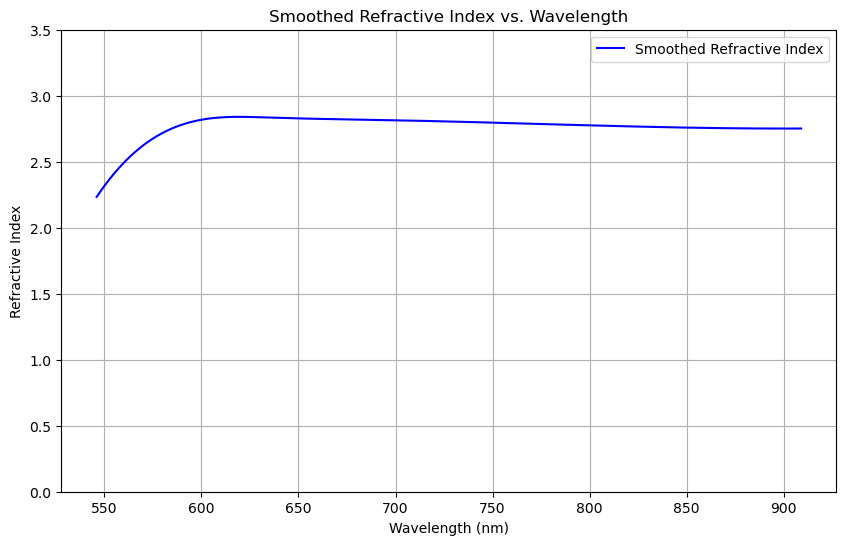

In [96]:
n_0 = 1
n_s = 1.5

# Prepare lists to store results for plotting
wavelengths = []
refractive_indices = []

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + 2*((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt((dielectric_constant)**2 - ((n_0)*(n_s))**2))

    # Store results for plotting
    wavelengths.append(lambdas[peak])
    refractive_indices.append(n)

# Interpolation for a smooth curve
interp_function = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000)
smooth_refractive_indices = interp_function(fine_lambdas)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(fine_lambdas, smooth_refractive_indices, label='Smoothed Refractive Index', color='blue')
plt.title('Smoothed Refractive Index vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
plt.grid(True)
plt.legend()

# Set y-axis to start from zero and extend beyond 3
plt.ylim(bottom=0, top=3.5)  # Adjust the top value as necessary to ensure it's above 3
#bottom komutu y ekseni başlangıç noktasını gösterir
#top komutu y ekseni bitiş noktasını gösterir

plt.show()

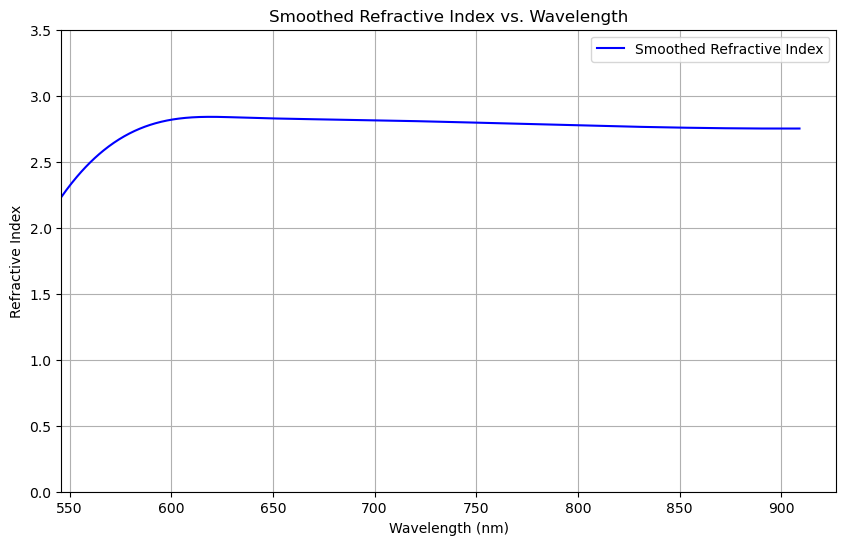

In [52]:
n_0 = 1
n_s = 1.5

# Prepare lists to store results for plotting
wavelengths = []
refractive_indices = []

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + 2*((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt((dielectric_constant)**2 - ((n_0)*(n_s))**2))

    # Store results for plotting
    wavelengths.append(lambdas[peak])  #wavelengths'e peak noktalarının dalga boyuna karşılık gelen bölümünü ekle
    refractive_indices.append(n)       #refractive_indice'e bulduğumuz n değerlerini.ekle üst kısımda 
                                       #wavelengths[] ve refractive_indice[] arraylerini tanımlaştık kodun üst kısmında
# Interpolation for a smooth curve
interp_function = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000)
smooth_refractive_indices = interp_function(fine_lambdas)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(fine_lambdas, smooth_refractive_indices, label='Smoothed Refractive Index', color='blue')
plt.title('Smoothed Refractive Index vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
plt.grid(True)
plt.legend()

# Set y-axis and x-axis limits
plt.ylim(bottom=0, top=3.5)  # Ensure y-axis goes slightly beyond 3.0
plt.xlim(left=min(wavelengths))  # Set x-axis to start from the first peak wavelength

plt.show()

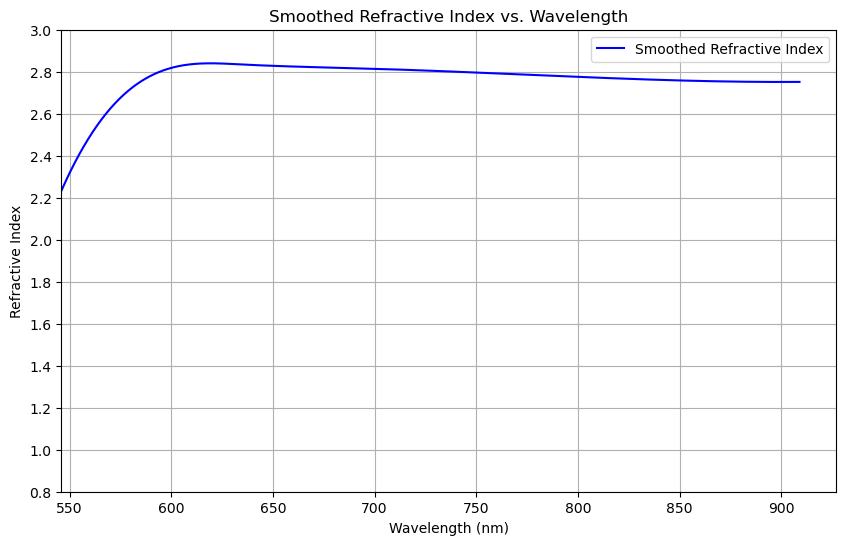

In [55]:
n_0 = 1
n_s = 1.5

# Prepare lists to store results for plotting
wavelengths = []
refractive_indices = []

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + 2*((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt((dielectric_constant)**2 - ((n_0)*(n_s))**2))

    # Store results for plotting
    wavelengths.append(lambdas[peak])
    refractive_indices.append(n)

# Interpolation for a smooth curve
interp_function = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000)
smooth_refractive_indices = interp_function(fine_lambdas)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(fine_lambdas, smooth_refractive_indices, label='Smoothed Refractive Index', color='blue')
plt.title('Smoothed Refractive Index vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
plt.grid(True)
plt.legend()

# Set y-axis and x-axis limits
plt.ylim(bottom=0.8)  # Start y-axis at 1.8
plt.xlim(left=min(wavelengths))  # Set x-axis to start from the first peak wavelength

# Ensure the y-axis covers values greater than 3
max_y_value = max(2.6, max(smooth_refractive_indices))  # plt.xlim(left=min(wavelengths)) 
plt.ylim(top=max_y_value)  # Adjusting the top y-axis limit

# Setting y-axis ticks to start from 1.8 and increase by 0.2
plt.yticks(np.arange(0.8, max_y_value + 0.2, 0.2))

plt.show()

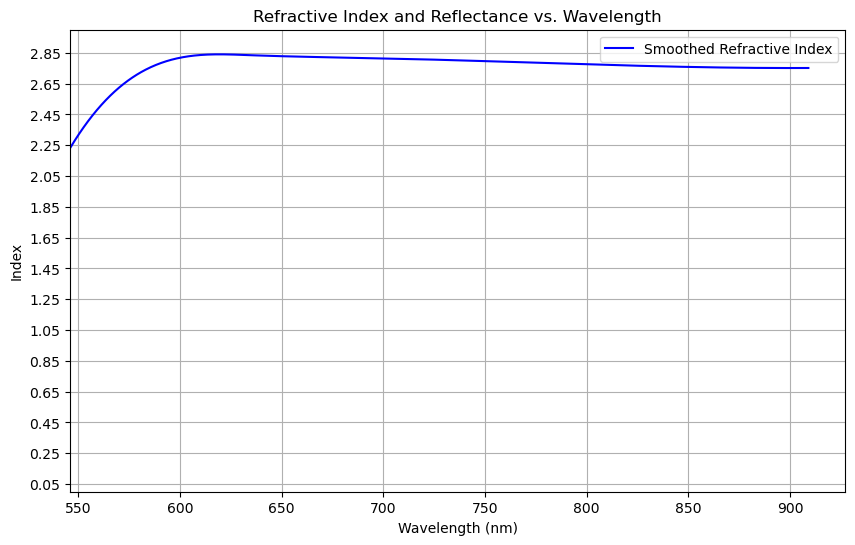

In [58]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assume peaks, troughs, film, n_0, n_s, and lambdas are defined elsewhere
# Example values:
# peaks = [...]
# troughs = [...]
# film = [...]
# n_0 = 1.0  # Example value for the refractive index of air
# n_s = 1.5  # Example value for the refractive index of the substrate
# lambdas = [...]  # Wavelengths corresponding to the peaks and troughs

n_0 = 1.0
n_s = 1.5

# Prepare lists to store results for plotting
wavelengths = []
refractive_indices = []
reflectance = []

# Define the r function
def calculate_r(n_0, n, n_s):   #def function fonksiyonu .def function(x,y,z) x,y,z fonksiyonu tanımlıyoruz.
    return abs((n_0 - (n**2 / n_s)) / (n_0 + (n**2 / n_s)))# return ile fonksiyonumuz tanımlayıp def func ile değerlerimizi
                                                            #atıyoruz.def func da istediğin kadar girdi tanımlıyabilirsin.

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs): #for döngüsü ikili veya daha fazla değer setine sahip .ürünleri,çıktısı  peak ve trough
    T_max = film[peak]                   # iterate ediyor.sırasıyla peaks ve troughs un bütün değerlerini hareketli okuyor. 
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2) / 2 + 2 * (n_0 * n_s * (T_max - T_min)) / (T_max * T_min)

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt(dielectric_constant**2 - (n_0 * n_s)**2))

    # Calculate reflectance r
    r = calculate_r(n_0, n, n_s)

    # Store results for plotting
    wavelengths.append(lambdas[peak])  # Assuming peak corresponds well with trough for simplicity
    refractive_indices.append(n)
    reflectance.append(r)

# Interpolation for a smooth curve
interp_function_refractive = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")
interp_function_reflective = interp1d(wavelengths, reflectance, kind='cubic', fill_value="extrapolate")

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000)
smooth_refractive_indices = interp_function_refractive(fine_lambdas)
smooth_reflectance = interp_function_reflective(fine_lambdas)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(fine_lambdas, smooth_refractive_indices, label='Smoothed Refractive Index', color='blue')
#plt.plot(fine_lambdas, smooth_reflectance, label='Smoothed Reflective Index', color='red')
#bir üst satırda plot kısmında reflectance grafiği de bulunmukta .önünde ki kareyi(#) sildiğimiz zaman çalışır hale gelecek
plt.title('Refractive Index and Reflectance vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Index')
plt.grid(True)
plt.legend()

# Set y-axis and x-axis limits
plt.ylim(bottom=0, top=3)  # Ensure y-axis goes slightly beyond 3
plt.xlim(left=min(wavelengths))# Set x-axis to start from the first peak wavelength

plt.yticks(np.arange(0.05, np.max(smooth_refractive_indices) + 0.2, 0.2))

plt.show()


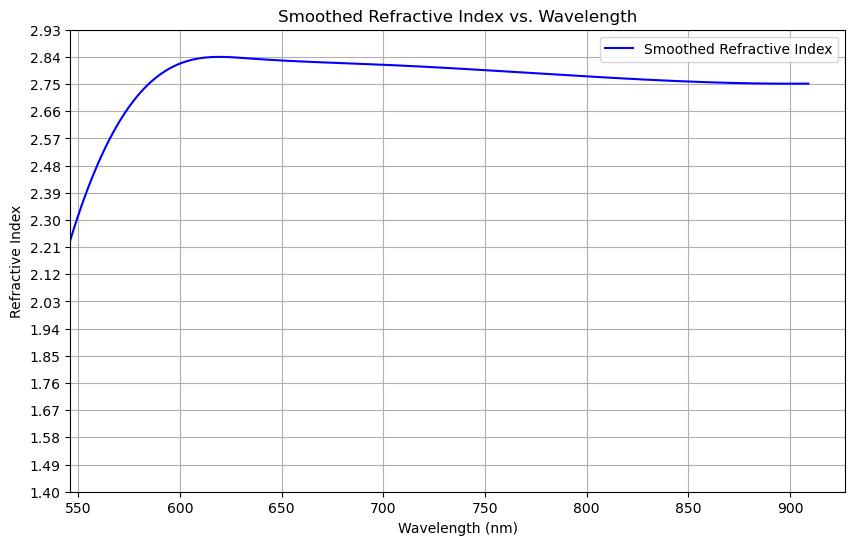

In [61]:
wavelengths = []
refractive_indices = []

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2)/2 + 2*((n_0)*(n_s)*(T_max - T_min))/((T_max)*(T_min))

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt((dielectric_constant)**2 - ((n_0)*(n_s))**2))

    # Store results for plotting
    wavelengths.append(lambdas[peak])
    refractive_indices.append(n)

# Interpolation for a smooth curve
interp_function = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000)
smooth_refractive_indices = interp_function(fine_lambdas)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(fine_lambdas, smooth_refractive_indices, label='Smoothed Refractive Index', color='blue')
plt.title('Smoothed Refractive Index vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
plt.grid(True)
plt.legend()

# Set y-axis and x-axis limits
plt.ylim(bottom=1.8)  # Start y-axis at 1.8 # biraz aşağı da plt.ysticks komutunda 1.4 ile başlattığım için bu komut görünmez
plt.xlim(left=min(wavelengths))  # Set x-axis to start from the first peak wavelength

# Setting y-axis ticks to start from 1.8 and increase by 0.2
plt.yticks(np.arange(1.4, np.max(smooth_refractive_indices) + 0.09, 0.09)) #y ekseni 1.4 den başla.
                                                                            #0.09 arttırarak çizdirdik y eksenini

plt.show()

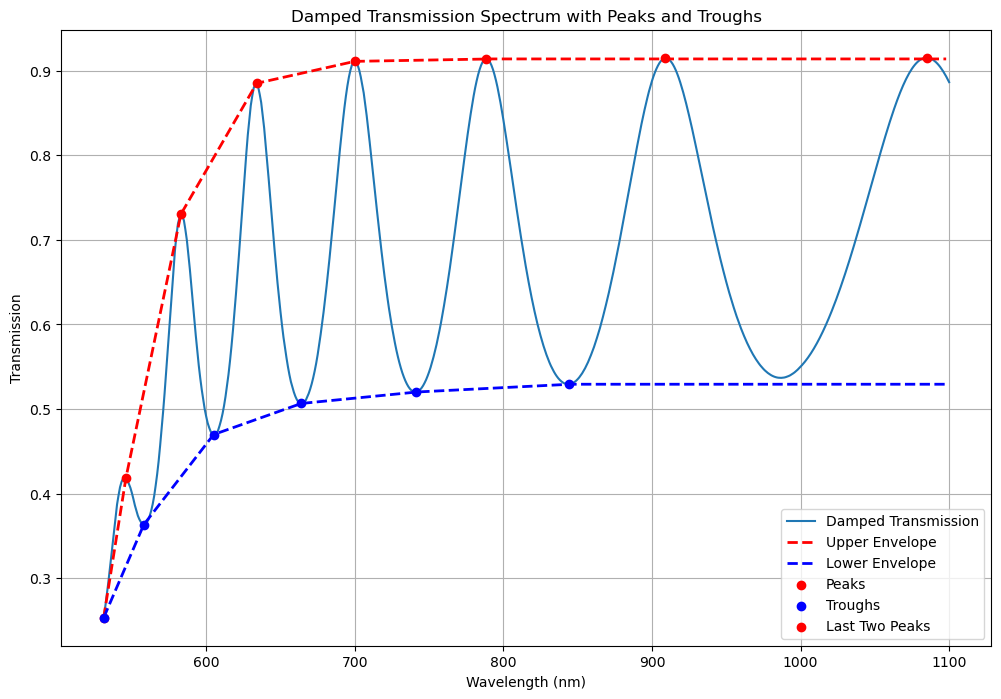

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parameters
#lambdas = np.linspace(400, 800, 1000)  # Wavelength range in nm
thickness = 500  # Thickness of the film in nm
refractive_index = 1.5  # Refractive index of the film

# Example film data (replace this with your actual data)
#film = 0.5 - 0.5 * np.exp(-0.0005 * (lambdas - 400)) * np.sin(4 * np.pi * refractive_index * thickness / lambdas + np.pi)

# Find peaks and troughs
peaks, _ = find_peaks(film)
#troughs u kodlamanın ilk başlarında belirlemiştik
#troughs, _ = find_peaks(-film)

# Including the first point for full range coverage
peaks = np.insert(peaks, 0, 0)
troughs = np.insert(troughs, 0, 0)

# Interpolating envelopes excluding the last two points for the upper envelope and the last point for the lower envelope
upper_envelope = np.interp(lambdas[:-2], lambdas[peaks[:-2]], film[peaks[:-2]])
lower_envelope = np.interp(lambdas[:-1], lambdas[troughs[:-1]], film[troughs[:-1]])

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(lambdas, film, label='Damped Transmission')
plt.plot(lambdas[:-2], upper_envelope, 'r--', label='Upper Envelope', linewidth=2)
plt.plot(lambdas[:-1], lower_envelope, 'b--', label='Lower Envelope', linewidth=2)

# Plot peaks and troughs for clarity, excluding the last points
plt.scatter(lambdas[peaks[:-2]], film[peaks[:-2]], color='red', zorder=5, label='Peaks')
plt.scatter(lambdas[troughs[:-1]], film[troughs[:-1]], color='blue', zorder=5, label='Troughs')

# Mark the last two peak values
plt.scatter(lambdas[peaks[-2:]], film[peaks[-2:]], color='red', zorder=5, label='Last Two Peaks')

plt.title('Damped Transmission Spectrum with Peaks and Troughs')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.legend()
plt.grid(True)
plt.show()


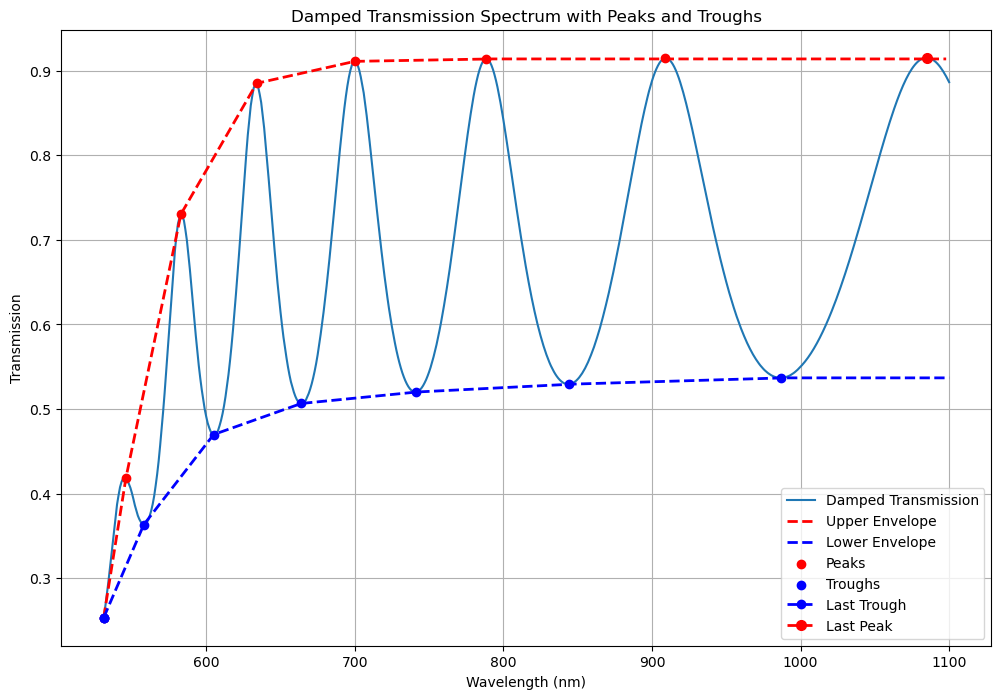

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming 'lambdas' and 'film' are already defined as your dataset
thickness = 500  # Thickness of the film in nm
refractive_index = 1.5  # Refractive index of the film

# Find peaks and troughs
peaks, _ = find_peaks(film)

# Including the first point for full range coverage and better envelope interpolation
peaks = np.insert(peaks, 0, 0)
troughs = np.insert(troughs, 0, 0)

# Interpolating envelopes excluding the last two points for the upper envelope and the last point for the lower envelope
upper_envelope = np.interp(lambdas[:-2], lambdas[peaks[:-2]], film[peaks[:-2]])
lower_envelope = np.interp(lambdas, lambdas[troughs], film[troughs])  # Include all trough points for interpolation

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(lambdas, film, label='Damped Transmission')
plt.plot(lambdas[:-2], upper_envelope, 'r--', label='Upper Envelope', linewidth=2)
plt.plot(lambdas, lower_envelope, 'b--', label='Lower Envelope', linewidth=2)  # Ensure it spans all troughs

# Plot peaks and troughs for clarity, excluding the last points
plt.scatter(lambdas[peaks[:-1]], film[peaks[:-1]], color='red', zorder=5, label='Peaks')
plt.scatter(lambdas[troughs[:-1]], film[troughs[:-1]], color='blue', zorder=5, label='Troughs')

# Mark the last trough value with 'o--' and a smaller markersize
plt.plot(lambdas[troughs[-1:]], film[troughs[-1:]], 'bo--', label='Last Trough', markersize=6, linewidth=2)

# Mark the last peak value with 'ro--' and a smaller markersize
plt.plot(lambdas[peaks[-1:]], film[peaks[-1:]], 'ro--', label='Last Peak', markersize=7, linewidth=2)

plt.title('Damped Transmission Spectrum with Peaks and Troughs')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.legend()
plt.grid(True)
plt.show()

np.insert: Bu işlev, tepe ve çukur dizilerinin başına bir değer eklemek için kullanılır. 0 indeksinin eklenmesi, zarfların ilk veri noktasından başlamasını sağlar; bu da daha doğru bir enterpolasyon oluşturulmasına yardımcı olabilir.

np.interp: Bu fonksiyon tek boyutlu doğrusal enterpolasyon için kullanılır. Burada üst_envelope ve alt_envelope'u oluşturmak için kullanılır:

Üst zarf, bazı nedenlerden dolayı (muhtemelen sınır etkilerinden kaçınmak için) son iki veri noktası hariç tutularak tepe noktalarından hesaplanır.

Alt zarf, tüm lambda aralığı boyunca enterpolasyonlu tüm çukur noktalarını içerir.

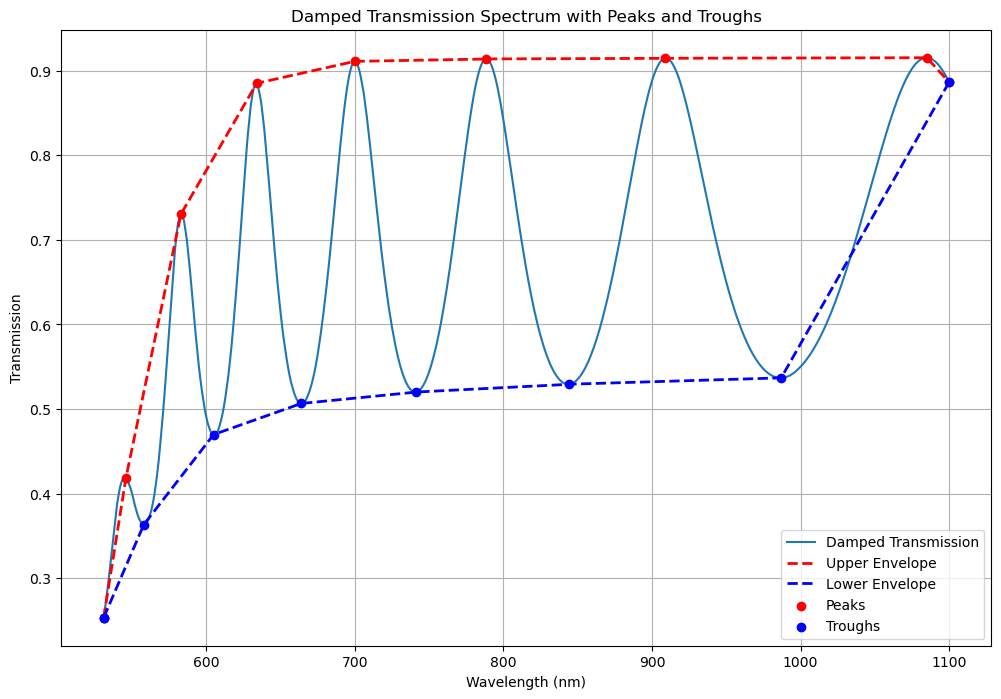

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parameters
#wavelength = np.linspace(400, 8000, 1000)  # Wavelength range in nm
thickness = 500  # Thickness of the film in nm
refractive_index = 1.5  # Refractive index of the film

# Damped transmission function
damping_factor = 0.0005 * (lambdas - 400)
#transmission = 0.5 - 0.5 * np.exp(-damping_factor) * np.sin(4 * np.pi * refractive_index * thickness / wavelength + np.pi)

# Find peaks and troughs
peaks, _ = find_peaks(film)
#troughs, _ = find_peaks(-film)

# Including the first and last point for full range coverage
peaks = np.insert(peaks, 0, 0)
troughs = np.insert(troughs, 0, 0)
peaks = np.append(peaks, len(film)-1)
troughs = np.append(troughs, len(film)-1)

# Constructing envelopes: Use np.interp for a basic linear interpolation between identified points
upper_envelope = np.interp(lambdas , lambdas[peaks], film[peaks])
lower_envelope = np.interp(lambdas, lambdas[troughs], film[troughs])

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(lambdas, film, label='Damped Transmission')
plt.plot(lambdas, upper_envelope, 'r--', label='Upper Envelope', linewidth=2)
plt.plot(lambdas, lower_envelope, 'b--', label='Lower Envelope', linewidth=2)

# Plot peaks and troughs for clarity
plt.scatter(lambdas[peaks], film[peaks], color='red', zorder=5, label='Peaks')
plt.scatter(lambdas[troughs], film[troughs], color='blue', zorder=5, label='Troughs')

plt.title('Damped Transmission Spectrum with Peaks and Troughs')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.legend()
plt.grid(True)
#plt.xlim(left=515) 
plt.show()



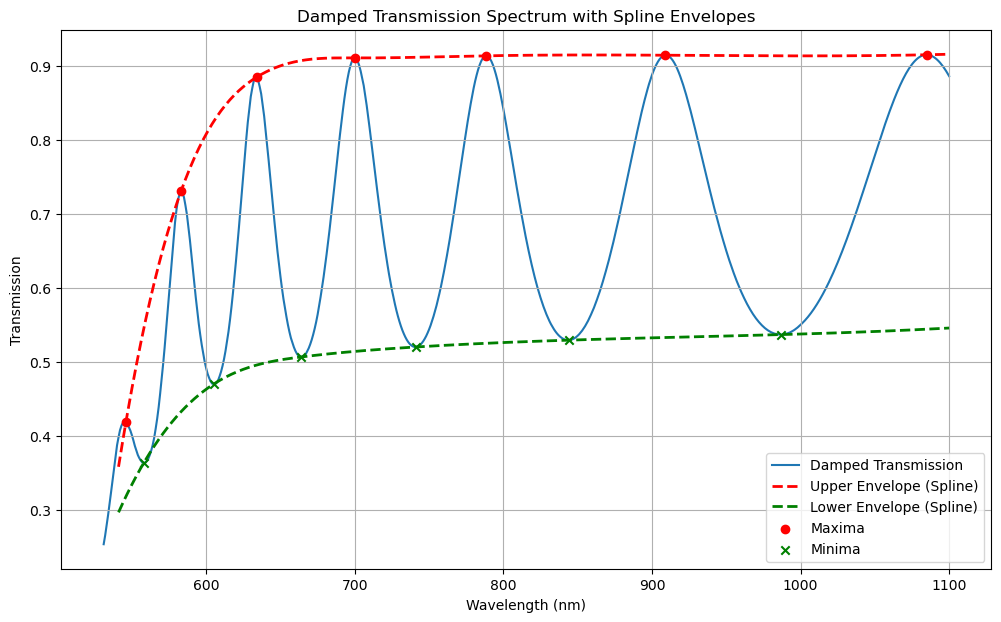

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, find_peaks
from scipy.interpolate import UnivariateSpline

# Load the data from the file
#data = np.load('/mnt/data/ENVELOPE.npy', allow_pickle=True).item()
#lambdas = data['lambdas']
#film = data['film']

# Parameters
thickness = 500  # Thickness of the film in nm
refractive_index = 1.5  # Refractive index of the film

# Calculate an approximate envelope using the Hilbert transform
transmission_envelope = np.abs(hilbert(film - np.mean(film)))

# Find peaks and troughs for maximum and minimum envelope points
peaks, _ = find_peaks(film)
troughs = [np.argmin(film[peaks[i]:peaks[i+1]]) + peaks[i] for i in range(len(peaks)-1)]

# Remove initial data points to avoid straight-line appearance in the envelope
initial_points_to_remove = 10
lambdas_trimmed = lambdas[initial_points_to_remove:]
film_trimmed = film[initial_points_to_remove:]
peaks_trimmed = peaks[peaks >= initial_points_to_remove] - initial_points_to_remove
troughs_trimmed = [t for t in troughs if t >= initial_points_to_remove]
troughs_trimmed = np.array(troughs_trimmed) - initial_points_to_remove

# Spline interpolation for the upper and lower envelopes with a smoothing factor
upper_envelope_spline = UnivariateSpline(lambdas_trimmed[peaks_trimmed], film_trimmed[peaks_trimmed], s=0, k=3)
lower_envelope_spline = UnivariateSpline(lambdas_trimmed[troughs_trimmed], film_trimmed[troughs_trimmed], s=0, k=3)

# Generating points for the envelope lines
envelope_upper_y = upper_envelope_spline(lambdas_trimmed)
envelope_lower_y = lower_envelope_spline(lambdas_trimmed)

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(lambdas, film, label='Damped Transmission', zorder=1)
plt.plot(lambdas_trimmed, envelope_upper_y, 'r--', label='Upper Envelope (Spline)', linewidth=2, zorder=2)
plt.plot(lambdas_trimmed, envelope_lower_y, 'g--', label='Lower Envelope (Spline)', linewidth=2, zorder=2)
plt.scatter(lambdas_trimmed[peaks_trimmed], film_trimmed[peaks_trimmed], marker='o', color='red', label='Maxima', zorder=3)
plt.scatter(lambdas_trimmed[troughs_trimmed], film_trimmed[troughs_trimmed], marker='x', color='green', label='Minima', zorder=3)

plt.title('Damped Transmission Spectrum with Spline Envelopes')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.legend()
plt.grid(True)
plt.show()


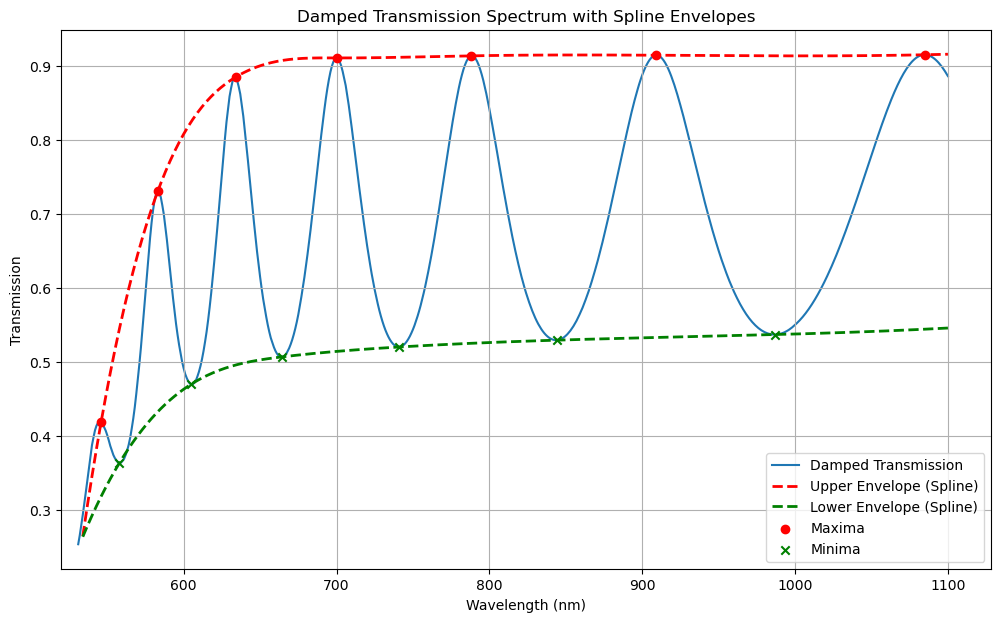

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, find_peaks
from scipy.interpolate import UnivariateSpline

# Load the data from the file
#data = np.load('/mnt/data/ENVELOPE.npy', allow_pickle=True).item()
#lambdas = data['lambdas']
#film = data['film']

# Parameters
thickness = 500  # Thickness of the film in nm
refractive_index = 1.5  # Refractive index of the film

# Calculate an approximate envelope using the Hilbert transform
transmission_envelope = np.abs(hilbert(film - np.mean(film)))

# Find peaks and troughs for maximum and minimum envelope points
peaks, _ = find_peaks(film)
troughs = [np.argmin(film[peaks[i]:peaks[i+1]]) + peaks[i] for i in range(len(peaks)-1)]

# Remove initial data points to avoid straight-line appearance in the envelope
initial_points_to_remove = 3
lambdas_trimmed = lambdas[initial_points_to_remove:]
film_trimmed = film[initial_points_to_remove:]
peaks_trimmed = peaks[peaks >= initial_points_to_remove] - initial_points_to_remove
troughs_trimmed = [t for t in troughs if t >= initial_points_to_remove]
troughs_trimmed = np.array(troughs_trimmed) - initial_points_to_remove

# Spline interpolation for the upper and lower envelopes with a smoothing factor
upper_envelope_spline = UnivariateSpline(lambdas_trimmed[peaks_trimmed], film_trimmed[peaks_trimmed], s=0, k=3)
lower_envelope_spline = UnivariateSpline(lambdas_trimmed[troughs_trimmed], film_trimmed[troughs_trimmed], s=0, k=3)

# Generating points for the envelope lines
envelope_upper_y = upper_envelope_spline(lambdas_trimmed)
envelope_lower_y = lower_envelope_spline(lambdas_trimmed)

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(lambdas, film, label='Damped Transmission', zorder=1)
plt.plot(lambdas_trimmed, envelope_upper_y, 'r--', label='Upper Envelope (Spline)', linewidth=2, zorder=2)
plt.plot(lambdas_trimmed, envelope_lower_y, 'g--', label='Lower Envelope (Spline)', linewidth=2, zorder=2)
plt.scatter(lambdas_trimmed[peaks_trimmed], film_trimmed[peaks_trimmed], marker='o', color='red', label='Maxima', zorder=3)
plt.scatter(lambdas_trimmed[troughs_trimmed], film_trimmed[troughs_trimmed], marker='x', color='green', label='Minima', zorder=3)

plt.title('Damped Transmission Spectrum with Spline Envelopes')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.legend()
plt.grid(True)
plt.xlim(left=520)
plt.show()


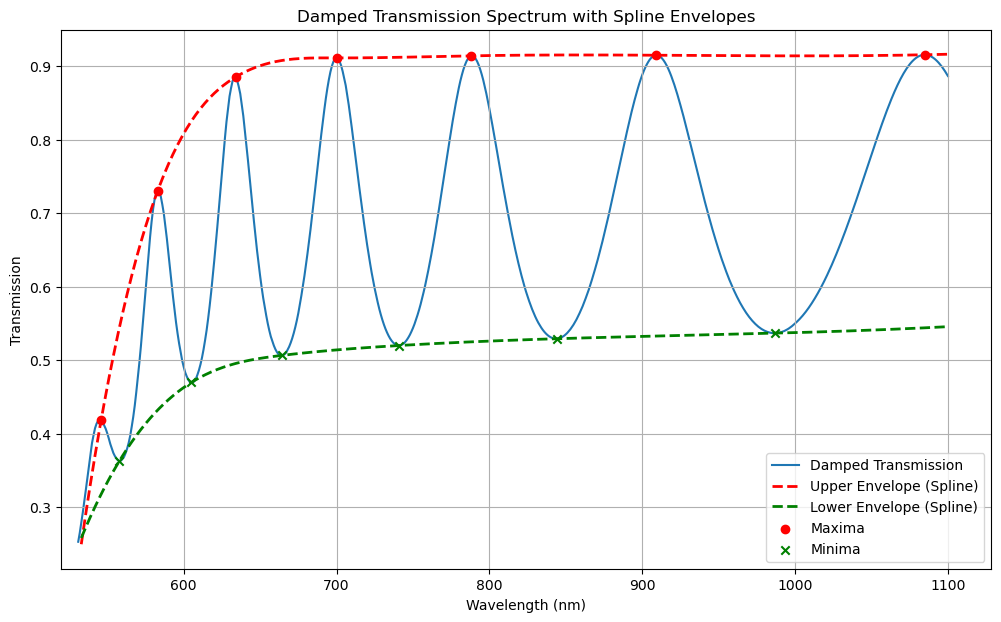

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, find_peaks
from scipy.interpolate import UnivariateSpline

# Load the data from the file
#data = np.load('/mnt/data/ENVELOPE.npy', allow_pickle=True).item()
#lambdas = data['lambdas']
#film = data['film']

# Parameters
thickness = 500  # Thickness of the film in nm
refractive_index = 1.5  # Refractive index of the film

# Calculate an approximate envelope using the Hilbert transform
transmission_envelope = np.abs(hilbert(film - np.mean(film)))

# Find peaks and troughs for maximum and minimum envelope points
peaks, _ = find_peaks(film)
troughs = [np.argmin(film[peaks[i]:peaks[i+1]]) + peaks[i] for i in range(len(peaks)-1)]

# Remove initial data points to avoid straight-line appearance in the envelope
initial_points_to_remove = 2
lambdas_trimmed = lambdas[initial_points_to_remove:]
film_trimmed = film[initial_points_to_remove:]
peaks_trimmed = peaks[peaks >= initial_points_to_remove] - initial_points_to_remove
troughs_trimmed = [t for t in troughs if t >= initial_points_to_remove]
troughs_trimmed = np.array(troughs_trimmed) - initial_points_to_remove

# Spline interpolation for the upper and lower envelopes with a smoothing factor
upper_envelope_spline = UnivariateSpline(lambdas_trimmed[peaks_trimmed], film_trimmed[peaks_trimmed], s=0, k=3)
lower_envelope_spline = UnivariateSpline(lambdas_trimmed[troughs_trimmed], film_trimmed[troughs_trimmed], s=0, k=3)

# Generating points for the envelope lines
envelope_upper_y = upper_envelope_spline(lambdas_trimmed)
envelope_lower_y = lower_envelope_spline(lambdas_trimmed)

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(lambdas, film, label='Damped Transmission', zorder=1)
plt.plot(lambdas_trimmed, envelope_upper_y, 'r--', label='Upper Envelope (Spline)', linewidth=2, zorder=2)
plt.plot(lambdas_trimmed, envelope_lower_y, 'g--', label='Lower Envelope (Spline)', linewidth=2, zorder=2)
plt.scatter(lambdas_trimmed[peaks_trimmed], film_trimmed[peaks_trimmed], marker='o', color='red', label='Maxima', zorder=3)
plt.scatter(lambdas_trimmed[troughs_trimmed], film_trimmed[troughs_trimmed], marker='x', color='green', label='Minima', zorder=3)

plt.title('Damped Transmission Spectrum with Spline Envelopes')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.legend()
plt.grid(True)
plt.xlim(left=520)
plt.show()


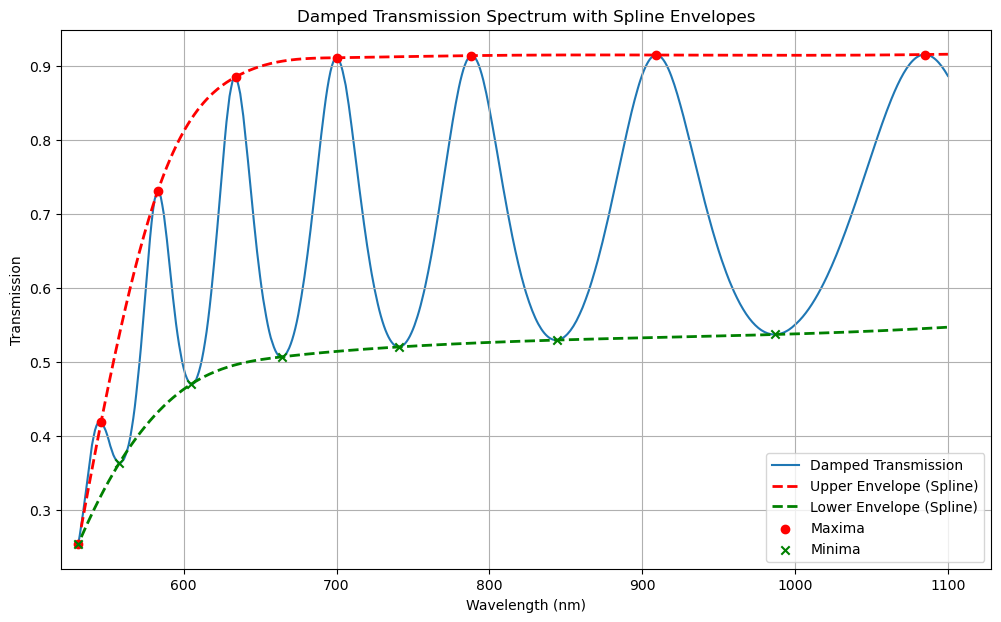

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, find_peaks
from scipy.interpolate import UnivariateSpline

# Parameters
thickness = 500  # Thickness of the film in nm
refractive_index = 1.5  # Refractive index of the film

# Calculate an approximate envelope using the Hilbert transform
transmission_envelope = np.abs(hilbert(film - np.mean(film)))

# Find peaks and troughs for maximum and minimum envelope points
peaks, _ = find_peaks(film)
troughs = [np.argmin(film[peaks[i]:peaks[i + 1]]) + peaks[i] for i in range(len(peaks) - 1)]

# Remove initial data points to avoid straight-line appearance in the envelope
initial_points_to_remove = 2
lambdas_trimmed = lambdas[initial_points_to_remove:]
film_trimmed = film[initial_points_to_remove:]
peaks_trimmed = peaks[peaks >= initial_points_to_remove] - initial_points_to_remove
troughs_trimmed = [t for t in troughs if t >= initial_points_to_remove]
troughs_trimmed = np.array(troughs_trimmed) - initial_points_to_remove

# Include the initial points in peaks and troughs to ensure the splines start from the same value
peaks_extended = np.concatenate(([0], peaks_trimmed))
troughs_extended = np.concatenate(([0], troughs_trimmed))

# Ensure the starting values are the same
initial_value = film[0]
film_extended_peaks = np.concatenate(([initial_value], film_trimmed[peaks_trimmed]))
film_extended_troughs = np.concatenate(([initial_value], film_trimmed[troughs_trimmed]))
lambdas_extended_peaks = np.concatenate(([lambdas[0]], lambdas_trimmed[peaks_trimmed]))
lambdas_extended_troughs = np.concatenate(([lambdas[0]], lambdas_trimmed[troughs_trimmed]))

# Spline interpolation for the upper and lower envelopes with a smoothing factor
upper_envelope_spline = UnivariateSpline(lambdas_extended_peaks, film_extended_peaks, s=0, k=3)
lower_envelope_spline = UnivariateSpline(lambdas_extended_troughs, film_extended_troughs, s=0, k=3)

# Generating points for the envelope lines
envelope_upper_y = upper_envelope_spline(lambdas_trimmed)
envelope_lower_y = lower_envelope_spline(lambdas_trimmed)

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(lambdas, film, label='Damped Transmission', zorder=1)
plt.plot(lambdas_trimmed, envelope_upper_y, 'r--', label='Upper Envelope (Spline)', linewidth=2, zorder=2)
plt.plot(lambdas_trimmed, envelope_lower_y, 'g--', label='Lower Envelope (Spline)', linewidth=2, zorder=2)
plt.scatter(lambdas_extended_peaks, film_extended_peaks, marker='o', color='red', label='Maxima', zorder=3)
plt.scatter(lambdas_extended_troughs, film_extended_troughs, marker='x', color='green', label='Minima', zorder=3)

plt.title('Damped Transmission Spectrum with Spline Envelopes')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.legend()
plt.grid(True)
plt.xlim(left=520)
plt.show()


Consecutive minimum refractive indices and their wavelengths:
Wavelength: 546 nm, Refractive Index: 2.2333307378791076
Wavelength: 583 nm, Refractive Index: 2.740078907763563

Wavelength: 583 nm, Refractive Index: 2.740078907763563
Wavelength: 909 nm, Refractive Index: 2.751522554503882

Consecutive maximum refractive indices and their wavelengths:
Wavelength: 788 nm, Refractive Index: 2.780322559443177
Wavelength: 700 nm, Refractive Index: 2.81391142275154

Wavelength: 700 nm, Refractive Index: 2.81391142275154
Wavelength: 634 nm, Refractive Index: 2.834859549285237



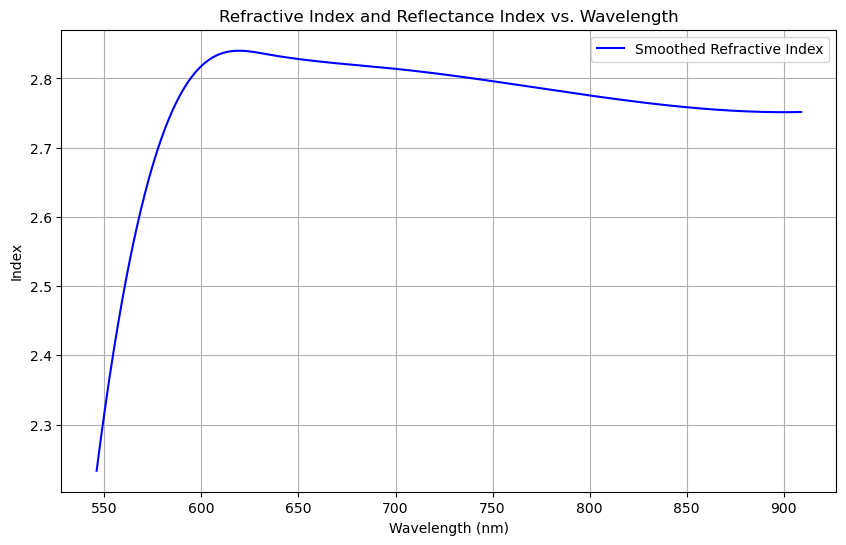

In [86]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


n_0 = 1.0
n_s = 1.5

# Prepare lists to store results for plotting
wavelengths = []
refractive_indices = []
reflective_indices = []

# Define the r function
def calculate_r(n_0, n, n_s):
    return abs((n_0 - (n**2 / n_s)) / (n_0 + (n**2 / n_s)))

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2) / 2 + 2 * (n_0 * n_s * (T_max - T_min)) / (T_max * T_min)

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt(dielectric_constant**2 - (n_0 * n_s)**2))

    # Calculate reflectance r
    r = calculate_r(n_0, n, n_s)
    

    # Store results for plotting
    wavelengths.append(lambdas[peak])  # Assuming peak corresponds well with trough for simplicity
    refractive_indices.append(n)
    reflective_indices.append(r)

# Interpolation for a smooth curve
interp_function_refractive = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")
interp_function_reflective = interp1d(wavelengths, reflective_indices, kind='cubic', fill_value="extrapolate")

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000)
smooth_refractive_indices = interp_function_refractive(fine_lambdas)
smooth_reflectance= interp_function_reflective(fine_lambdas)

# Find indices of the maxima and minima in refractive_indices
sorted_indices = np.argsort(refractive_indices)
min_indices = sorted_indices[:3]
max_indices = sorted_indices[-3:]

# Get consecutive pairs
consecutive_min_indices = [min_indices[:2], min_indices[1:]]
consecutive_max_indices = [max_indices[:2], max_indices[1:]]

# Print the results for consecutive minima
print("Consecutive minimum refractive indices and their wavelengths:")
for pair in consecutive_min_indices:
    for i in pair:
        print(f"Wavelength: {wavelengths[i]} nm, Refractive Index: {refractive_indices[i]}")
    print()  # For spacing between pairs

# Print the results for consecutive maxima
print("Consecutive maximum refractive indices and their wavelengths:")
for pair in consecutive_max_indices:
    for i in pair:
        print(f"Wavelength: {wavelengths[i]} nm, Refractive Index: {refractive_indices[i]}")
    print()  # For spacing between pairs

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(fine_lambdas, smooth_refractive_indices, label='Smoothed Refractive Index', color='blue')
#plt.plot(fine_lambdas, smooth_reflectance, label='Smoothed Reflective Index', color='red')
plt.title('Refractive Index and Reflectance Index vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Index')
plt.grid(True)
plt.legend()
plt.show()


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# Assuming 'lambdas' and 'film' are already defined as your dataset
thickness = 500  # Thickness of the film in nm
refractive_index = 1.5  # Refractive index of the film


# Prepare lists to store results for plotting
wavelengths = []
refractive_indices = []
reflective_indices = []

# Define the r function
def calculate_r(n_0, n, n_s):
    return abs((n_0 - (n**2 / n_s)) / (n_0 + (n**2 / n_s)))

n_0 = 1.0
n_s = 1.5

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2) / 2 + 2 * (n_0 * n_s * (T_max - T_min)) / (T_max * T_min)

    # Calculate the argument inside the square root
    argument = dielectric_constant**2 - (n_0 * n_s)**2

    # Ensure the argument inside the square root is non-negative
    argument = max(argument, 0)

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt(argument))

    # Calculate reflectance r
    r = calculate_r(n_0, n, n_s)

    # Store results for plotting
    wavelengths.append(lambdas[peak])  # Assuming peak corresponds well with trough for simplicity
    refractive_indices.append(n)
    reflective_indices.append(r)

# Interpolation for a smooth curve
interp_function_refractive = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")
interp_function_reflective = interp1d(wavelengths, reflective_indices, kind='cubic', fill_value="extrapolate")

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000)
smooth_refractive_indices = interp_function_refractive(fine_lambdas)
smooth_reflective_indices = interp_function_reflective(fine_lambdas)

# Function to calculate the expression for pairs of refractive indices and wavelengths
def calculate_expression(wavelengths, refractive_indices):
    results = []
    for i in range(len(wavelengths) - 1):
        n_i = refractive_indices[i]
        n_i1 = refractive_indices[i + 1]
        lambda_i = wavelengths[i]
        lambda_i1 = wavelengths[i + 1]
        result = abs(n_i1 * lambda_i - n_i * lambda_i1)
        results.append(result)
    return results

# Function to calculate the modified expression
def calculate_modified_expression(wavelengths, refractive_indices):
    expressions = calculate_expression(wavelengths, refractive_indices)
    results = []
    for i in range(len(expressions)-1):
        lambda_i = wavelengths[i]
        lambda_i1 = wavelengths[i + 1]
        result = abs((lambda_i * lambda_i1 )/( 2*expressions[i])) if expressions[i] != 0 else float('inf')
        results.append(result)
    return results

# Calculate the expressions for the pairs
expression_results = calculate_modified_expression(wavelengths, refractive_indices)

# Ensure we get the correct number of results
expression_results = expression_results[:len(wavelengths) - 1]

# Calculate the mean value of the expressions
mean_value = np.mean(expression_results)

# Print the results and the mean value
print("Calculated expressions for consecutive pairs(nm):")
for i, result in enumerate(expression_results):
    print(f"Expression {i}: {result}")

print(f"\nMean value of the expressions thickness(nm): {mean_value}")




Calculated expressions for consecutive pairs(nm):
Expression 0: 820.190485575438
Expression 1: 2187.4512793550075
Expression 2: 1107.3857653917667
Expression 3: 1017.2001631588356

Mean value of the expressions thickness(nm): 1283.0569233702618


Calculated expressions for consecutive pairs(nm):
Expression 0: 820.190485575438
Expression 1: 2187.4512793550075
Expression 2: 1107.3857653917667
Expression 3: 1017.2001631588356

Mean value of the expressions thickness(nm): 1283.0569233702618


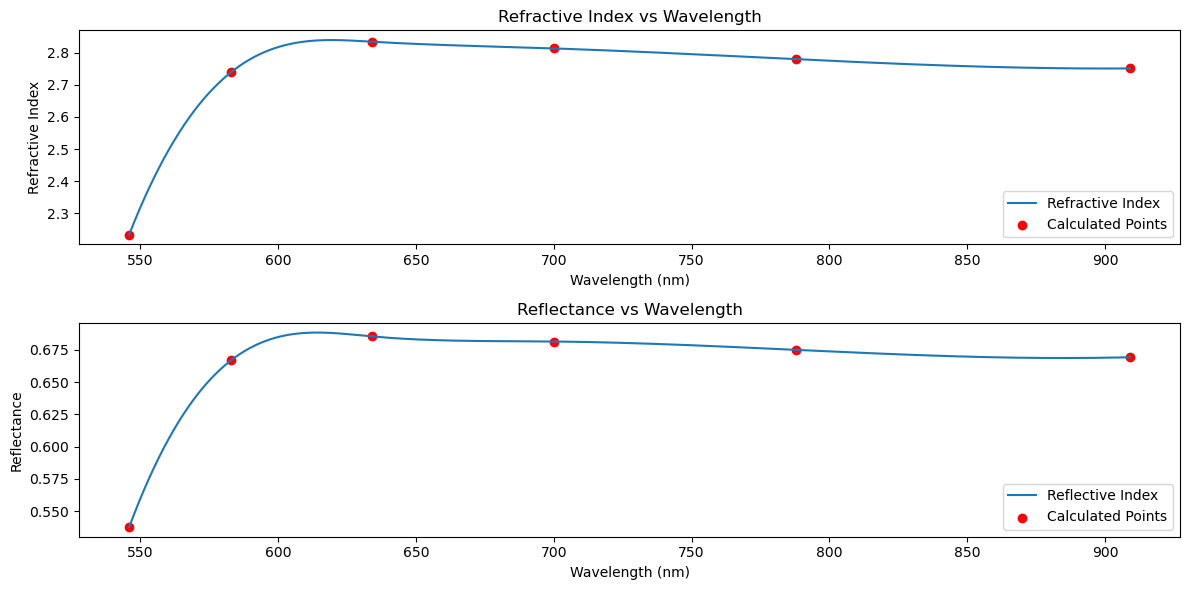

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# Load the data
#lambdas = data['Lambda (nm)'].values
#film = data['Película'].values

# Find peaks and troughs
peaks, _ = find_peaks(film)
#troughs, _ = find_peaks(-film)

# Convert peaks and troughs to numpy arrays if they are not already
peaks = np.array(peaks)
troughs = np.array(troughs)

# Ensure peaks and troughs are within the valid range
peaks = peaks[peaks < len(film)]
troughs = troughs[troughs < len(film)]

# Ensure the lengths of peaks and troughs match for simplicity
min_length = min(len(peaks), len(troughs))
peaks = peaks[:min_length]
troughs = troughs[:min_length]

# Prepare lists to store results for plotting
wavelengths = []
refractive_indices = []
reflective_indices = []

# Define the r function
def calculate_r(n_0, n, n_s):
    return abs((n_0 - (n**2 / n_s)) / (n_0 + (n**2 / n_s)))

n_0 = 1.0
n_s = 1.5

# Iterate through peaks and their corresponding troughs
for peak, trough in zip(peaks, troughs):
    T_max = film[peak]
    T_min = film[trough]

    # Calculate dielectric constant
    dielectric_constant = ((n_0)**2 + (n_s)**2) / 2 + 2 * (n_0 * n_s * (T_max - T_min)) / (T_max * T_min)

    # Calculate the argument inside the square root
    argument = dielectric_constant**2 - (n_0 * n_s)**2

    # Ensure the argument inside the square root is non-negative
    argument = max(argument, 0)

    # Calculate the refractive index n
    n = np.sqrt(dielectric_constant + np.sqrt(argument))

    # Calculate reflectance r
    r = calculate_r(n_0, n, n_s)

    # Store results for plotting
    wavelengths.append(lambdas[peak])  # Assuming peak corresponds well with trough for simplicity
    refractive_indices.append(n)
    reflective_indices.append(r)

# Interpolation for a smooth curve
interp_function_refractive = interp1d(wavelengths, refractive_indices, kind='cubic', fill_value="extrapolate")
interp_function_reflective = interp1d(wavelengths, reflective_indices, kind='cubic', fill_value="extrapolate")

# Fine grid for plotting
fine_lambdas = np.linspace(min(wavelengths), max(wavelengths), 1000)
smooth_refractive_indices = interp_function_refractive(fine_lambdas)
smooth_reflective_indices = interp_function_reflective(fine_lambdas)

# Function to calculate the expression for pairs of refractive indices and wavelengths
def calculate_expression(wavelengths, refractive_indices):
    results = []
    for i in range(len(wavelengths)- 1 ):
        n_i = refractive_indices[i]
        n_i1 = refractive_indices[i + 1]
        lambda_i = wavelengths[i]
        lambda_i1 = wavelengths[i + 1]
        result = abs(n_i1 * lambda_i - n_i * lambda_i1)
        results.append(result)
    return results

# Function to calculate the modified expression
def calculate_modified_expression(wavelengths, refractive_indices):
    expressions = calculate_expression(wavelengths, refractive_indices)
    results = []
    for i in range(len(expressions) - 1):
        lambda_i = wavelengths[i]
        lambda_i1 = wavelengths[i + 1]
        result = abs((lambda_i * lambda_i1 )/( 2*expressions[i])) if expressions[i] != 0 else float('inf')
        results.append(result)
    return results

# Calculate the expressions for the pairs
expression_results = calculate_modified_expression(wavelengths, refractive_indices)

# Ensure we get the correct number of results
expression_results = expression_results[:len(wavelengths) ]

# Calculate the mean value of the expressions
mean_value = np.mean(expression_results)

# Print the results and the mean value
print("Calculated expressions for consecutive pairs(nm):")
for i, result in enumerate(expression_results):
    print(f"Expression {i}: {result}")

print(f"\nMean value of the expressions thickness(nm): {mean_value}")

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(fine_lambdas, smooth_refractive_indices, label='Refractive Index')
plt.scatter(wavelengths, refractive_indices, color='red', label='Calculated Points')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
plt.title('Refractive Index vs Wavelength')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fine_lambdas, smooth_reflective_indices, label='Reflective Index')
plt.scatter(wavelengths, reflective_indices, color='red', label='Calculated Points')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance vs Wavelength')
plt.legend()

plt.tight_layout()
plt.show()

